In [ ]:
#from torch_snippets import *
import pandas as pd
import numpy as np
from PIL import Image
import torch
import torchvision
import glob
#from pytorchtools import EarlyStopping
#IMAGE_ROOT = 'images/images'
#DF_RAW = df = pd.read_csv('df.csv')

For SSD **module**

In [ ]:
!git clone https://github.com/sizhky/ssd-utils/

Cloning into 'ssd-utils'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [ ]:
%cd ssd-utils

In [ ]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
!pip install pytorchtools


*   Source: https://github.com/PacktPublishing/Modern-Computer-Vision-with-PyTorch/blob/master/Chapter08/Training_Faster_RCNN.ipynb



In [ ]:
EarlyStopping reference:

https://github.com/Bjarten/early-stopping-pytorch/blob/master/MNIST_Early_Stopping_example.ipynb


In [ ]:
from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


In [ ]:
!nvidia-smi
# this line is to check which GPU you have been allocated
# if you want a different GPU, do 'Factory Reset Runtime' and then run this command again.

Mon Apr  4 11:00:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# checking if cuda is available
from torch import device as device_

device = device_("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
import os
anotpath ='mount/My Drive/doctr_data/annotations/'
imagepath = 'mount/My Drive/doctr_data/training/'
anotfiles = os.listdir(anotpath)
imagefiles = os.listdir(imagepath)

In [ ]:
import json
anot1 = open(anotpath+'/'+anotfiles[0],'r').readlines() # the json file with all details
coordinates = json.loads(anot1[0])
for f in coordinates:
  if f not in imagefiles:
    print(f)
#images10 = imagefiles[:10]
#boxesAll = [coordinates[i]['polygons'] for i in imagesfiles]
#boxes10 = np.array([np.array([np.array([box[0][0],box[0][1],box[3][0],box[3][1]]) for box in boxes]) for boxes in boxesAll])
#images = [imagepath+'/'+imagefile for imagefile in images10]
#newImages10 = [cv2.imread(img) for img in images]

sample_img_3.png
sample_img_17.png
sample_img_20.png
sample_img_23.png
sample_img_31.png
sample_img_60.png
sample_img_81.png
sample_img_89.png
sample_img_91.png
sample_img_94.png
sample_img_114.png
sample_img_125.png
sample_img_130.png


In [ ]:
list(img for img in coordinates)

In [ ]:
imagefiles

In [ ]:
data=[]
for image in imagefiles:
  imageName=image
  innerValues = coordinates[image]
  imageShape = innerValues['img_dimensions']
  boxes = innerValues['polygons']
  for i in range(len(boxes)):
    box = boxes[i]
    data.append(np.array([imageName,box[0][0],box[0][1],box[3][0],box[3][1],imageShape,'text']))

data = np.array(data)
np.random.shuffle(data)    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':


In [ ]:
len(data)

6204

In [ ]:
print (len(data))
data = data[:(int(len(data)/3))]
print (len(data))

6204
2068


In [ ]:
data[:5]

array([['sample_img_113.png', 44.0, 962.0, 149.0, 1038.0,
        list([2017, 936, 3]), 1],
       ['sample_img_61.png', 242.0, 848.0, 304.0, 871.0,
        list([1555, 619, 3]), 1],
       ['sample_img_76.png', 596.0, 1327.0, 769.0, 1357.0,
        list([2264, 890, 3]), 1],
       ['sample_img_97.png', 207.0, 335.0, 507.0, 370.0,
        list([1659, 706, 3]), 1],
       ['sample_img_42.png', 564.0, 1542.0, 657.0, 1574.0,
        list([2053, 702, 3]), 1]], dtype=object)

In [ ]:
df = pd.DataFrame(data,columns=['ImageID','XMin','YMin','XMax','YMax','image_shape','LabelName'])
df.head()

,ImageID,XMin,YMin,XMax,YMax,image_shape,LabelName
0,sample_img_78.png,25.0,385.0,111.0,407.0,"[1312, 616, 3]",text
1,sample_img_103.png,320.0,1243.0,426.0,1266.0,"[1334, 791, 3]",text
2,sample_img_30.png,93.0,1320.0,265.0,1355.0,"[1799, 795, 3]",text
3,sample_img_28.png,243.0,659.0,351.0,684.0,"[1475, 619, 3]",text
4,sample_img_21.png,364.0,492.0,414.0,517.0,"[1072, 584, 3]",text


In [ ]:
'sample_img_.png' in df['ImageID'].values

True

In [ ]:

label2target = {l:t+1 for t,l in enumerate(df['LabelName'].unique())}
label2target = {'background':0,'text':1}
background_class = label2target['background']
num_classes = len(label2target)
target2label = {t:l for l,t in label2target.items()}

In [ ]:
target2label

{0: 'background', 1: 'text'}

In [ ]:
def preprocess_image(img):
    img = torch.tensor(img).permute(2,0,1)
    return img.to(device).float()

In [ ]:
from torch.utils.data import DataLoader,Dataset
IMAGE_ROOT=imagepath

class OpenDataset(Dataset): 
    #w, h = 224, 224
  def __init__(self, df, image_dir=IMAGE_ROOT):
    super().__init__()
    self.image_dir = image_dir
    #self.files = glob.glob(self.image_dir+'/*')
    self.df = df
    self.image_infos = df.ImageID.unique()

  def __getitem__(self, ix):
    # load images and masks
    image_id = self.image_infos[ix]
    img_path = imagepath+'/'+image_id
    img = Image.open(img_path).convert("RGB")
    #img = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)

    
    #img = np.array(img.resize((self.w, self.h), resample=Image.BILINEAR))/255.
    img = np.array(img)/255
    data = self.df[df['ImageID'] == image_id]
    labels = data['LabelName'].values.tolist()
    data = data[['XMin','YMin','XMax','YMax']].values
    #data[:,[0,2]] *= self.w # for resizing the images
    #data[:,[1,3]] *= self.h # for resizing the images
    boxes = data.astype(np.uint32).tolist() # convert to absolute coordinates
    # torch FRCNN expects ground truths as a dictionary of tensors
    target = {}
    target["boxes"] = torch.Tensor(boxes).float()
    target["labels"] = torch.Tensor([label2target[i] for i in labels]).long()
    img = preprocess_image(img)
    return img, target

  def collate_fn(self, batch):
    return tuple(zip(*batch)) 

  def __len__(self):
    return len(self.image_infos)

In [ ]:
from sklearn.model_selection import train_test_split


trn_ids, val_ids = train_test_split(df['ImageID'].unique(), test_size=0.1, random_state=99)
trn_df, val_df = df[df['ImageID'].isin(trn_ids)], df[df['ImageID'].isin(val_ids)]
print ('training length: ',len(trn_df),' validation length:', len(val_df))

train_ds = OpenDataset(trn_df)
test_ds = OpenDataset(val_df)

train_loader = DataLoader(train_ds, batch_size=4, collate_fn=train_ds.collate_fn, drop_last=True)
test_loader = DataLoader(test_ds, batch_size=4, collate_fn=test_ds.collate_fn, drop_last=True)

training length:  1861  validation length: 207


In [ ]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

device = 'cuda' if torch.cuda.is_available() else 'cpu'

def get_model():
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

In [ ]:
# Defining training and validation functions for a single batch
def train_batch(inputs, model, optimizer):
    model.train()
    input, targets = inputs
    input = list(image.to(device) for image in input)
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
    optimizer.zero_grad()
    losses = model(input, targets)
    loss = sum(loss for loss in losses.values())
    loss.backward()
    optimizer.step()
    return loss, losses

@torch.no_grad() # this will disable gradient computation in the function below
def validate_batch(inputs, model):
    model.train() # to obtain the losses, model needs to be in train mode only. # #Note that here we are not defining the model's forward method 
    # and hence need to work per the way the model class is defined
    input, targets = inputs
    input = list(image.to(device) for image in input)
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

    optimizer.zero_grad()
    losses = model(input, targets)
    loss = sum(loss for loss in losses.values())
    return loss, losses

In [ ]:
!pip install torch_snippets

     |████████████████████████████████| 45 kB 1.7 MB/s 
     |████████████████████████████████| 10.9 MB 7.4 MB/s 
     |████████████████████████████████| 78 kB 6.9 MB/s 
     |████████████████████████████████| 948 kB 43.7 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 58 kB 6.0 MB/s 
     |████████████████████████████████| 229 kB 52.4 MB/s 
     |████████████████████████████████| 51 kB 7.4 MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26325 sha256=d68db2b1d9474d53f28523c2de1db452c5124f0e53d039e523fe97de53f442e4
  Stored in directory: /root/.cache/pip/wheels/35/f3/15/01aa6571f0a72ee6ae7b827c1491c37a1f72d686fd22b43b0e
Successfully built typing
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. Th

In [ ]:
from torch_snippets import Report
model = get_model().to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=0.005,momentum=0.9, weight_decay=0.0005)

n_epochs = 20
log = Report(n_epochs)

In [ ]:
for epoch in range(n_epochs):
  # to track the training loss as the model trains
    train_losses = []
    # to track the validation loss as the model trains
    valid_losses = []
    # to track the average training loss per epoch as the model trains
    avg_train_losses = []
    # to track the average validation loss per epoch as the model trains
    avg_valid_losses = [] 

    # initialize the early_stopping object
    early_stopping = EarlyStopping(patience=3, verbose=True)

    _n = len(train_loader)
    for ix, inputs in enumerate(train_loader):
        loss, losses = train_batch(inputs, model, optimizer)
        loc_loss, regr_loss, loss_objectness, loss_rpn_box_reg = \
            [losses[k] for k in ['loss_classifier','loss_box_reg','loss_objectness','loss_rpn_box_reg']]
        pos = (epoch + (ix+1)/_n)
        log.record(pos, trn_loss=loss.item(), trn_loc_loss=loc_loss.item(), 
                   trn_regr_loss=regr_loss.item(), trn_objectness_loss=loss_objectness.item(),
                   trn_rpn_box_reg_loss=loss_rpn_box_reg.item(), end='\r')
        # record training loss
        train_losses.append(loss.item())

    _n = len(test_loader)
    for ix,inputs in enumerate(test_loader):
        loss, losses = validate_batch(inputs, model)
        loc_loss, regr_loss, loss_objectness, loss_rpn_box_reg = \
          [losses[k] for k in ['loss_classifier','loss_box_reg','loss_objectness','loss_rpn_box_reg']]
        pos = (epoch + (ix+1)/_n)
        log.record(pos, val_loss=loss.item(), val_loc_loss=loc_loss.item(), 
                  val_regr_loss=regr_loss.item(), val_objectness_loss=loss_objectness.item(),
                  val_rpn_box_reg_loss=loss_rpn_box_reg.item(), end='\r')
        # record validation loss
        valid_losses.append(loss.item())


    # print training/validation statistics 
    # calculate average loss over an epoch
    train_loss = np.average(train_losses)
    valid_loss = np.average(valid_losses)
    avg_train_losses.append(train_loss)
    avg_valid_losses.append(valid_loss)
        
    epoch_len = len(str(n_epochs))
        
    print_msg = (f'[{epoch:>{epoch_len}}/{n_epochs:>{epoch_len}}] ' +
                 f'train_loss: {train_loss:.5f} ' +
                 f'valid_loss: {valid_loss:.5f}')
        
    print(print_msg)
        
    # clear lists to track next epoch
    train_losses = []
    valid_losses = []
        
    # early_stopping needs the validation loss to check if it has decresed, 
    # and if it has, it will make a checkpoint of the current model
    early_stopping(valid_loss, model)
        
    if early_stopping.early_stop:
      print("Early stopping")
      break
    print('\n')    
    # load the last checkpoint with the best model
    model.load_state_dict(torch.load('checkpoint.pt'))

    if (epoch+1)%(n_epochs//5)==0: log.report_avgs(epoch+1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


EPOCH: 1.000	val_loss: 0.791	val_loc_loss: 0.224	val_regr_loss: 0.202	val_objectness_loss: 0.163	val_rpn_box_reg_loss: 0.202	(278.61s - 5293.55s remaining)[ 0/20] train_loss: 3.41358 valid_loss: 8.47075
Validation loss decreased (inf --> 8.470755).  Saving model ...


EPOCH: 2.000	val_loss: 0.835	val_loc_loss: 0.285	val_regr_loss: 0.193	val_objectness_loss: 0.138	val_rpn_box_reg_loss: 0.218	(375.62s - 3380.54s remaining)[ 1/20] train_loss: 3.13038 valid_loss: 8.48996
Validation loss decreased (inf --> 8.489963).  Saving model ...


EPOCH: 3.000	val_loss: 0.745	val_loc_loss: 0.271	val_regr_loss: 0.183	val_objectness_loss: 0.112	val_rpn_box_reg_loss: 0.179	(473.25s - 2681.76s remaining)[ 2/20] train_loss: 3.08916 valid_loss: 8.40034
Validation loss decreased (inf --> 8.400340).  Saving model ...


EPOCH: 4.000	val_loss: 0.722	val_loc_loss: 0.261	val_regr_loss: 0.163	val_objectness_loss: 0.128	val_rpn_box_reg_loss: 0.170	(570.78s - 2283.13s remaining)[ 3/20] train_loss: 2.99717 valid_loss

**Visualizing the Loss and the Early Stopping Checkpoint**
From the plot we can see that the last Early Stopping Checkpoint was saved right before the model started to overfit.

In [ ]:
from matplotlib import pyplot as plt

# visualize the loss as the network trained
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(train_losses)+1),train_losses, label='Training Loss')
plt.plot(range(1,len(valid_losses)+1),valid_losses,label='Validation Loss')

# find position of lowest validation loss
minposs = valid_losses.index(min(valid_losses))+1 
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim(0, 0.5) # consistent scale
plt.xlim(0, len(train_losses)+1) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('loss_plot.png', bbox_inches='tight')


In [ ]:
valid_losses

[]

100%|██████████| 121/121 [00:00<00:00, 5016.22it/s]


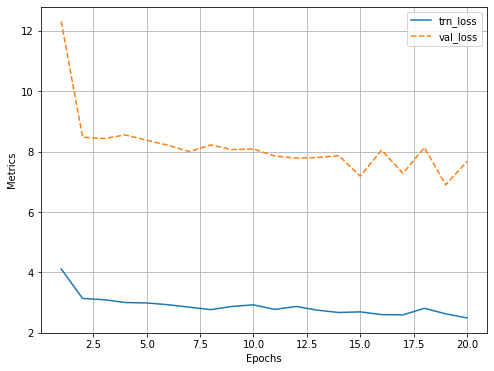

In [ ]:
log.plot_epochs(['trn_loss','val_loss'])

In [ ]:
from torchvision.ops import nms
def decode_output(output):
    'convert tensors to numpy arrays'
    bbs = output['boxes'].cpu().detach().numpy().astype(np.uint16)
    labels = np.array([target2label[i] for i in output['labels'].cpu().detach().numpy()])
    confs = output['scores'].cpu().detach().numpy()
    ixs = nms(torch.tensor(bbs.astype(np.float32)), torch.tensor(confs), 0.05)
    bbs, confs, labels = [tensor[ixs] for tensor in [bbs, confs, labels]]

    if len(ixs) == 1:
        bbs, confs, labels = [np.array([tensor]) for tensor in [bbs, confs, labels]]
    return bbs.tolist(), confs.tolist(), labels.tolist()


In [ ]:
help(output['boxes'])

In [ ]:
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

model.eval()
for ix, (images, targets) in enumerate(test_loader):
    if ix==3: break
    images = [im for im in images]
    outputs = model(images)
    cv2_imshow(images[ix].cpu().permute(1,2,0).numpy())
    for ix, output in enumerate(outputs):
        bbs, confs, labels = decode_output(output)
        info = [f'{l}@{c:.2f}' for l,c in zip(labels, confs)]
        image1 = images[ix].cpu().permute(1,2,0).numpy()
        #image1 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
        #print (type(image1))
        #print ([tuple(bb) for bb in bbs])
        for bb in bbs:
          #print (tuple(bb))
          # print((bb[0],bb[1]),(bb[2],bb[3]))
          #print(type(image1))
          cv2.rectangle(image1,(bb[0],bb[1]),(bb[2],bb[3]),(255,0,0),3)
          #cv2.rectangle(image1,(100,100),(200,200),(255, 0, 0), 3)
          # cv2.rectangle(image1,(bb[0],bb[1]),(bb[2],bb[3]),(255, 0, 0), 3)
          #print (images[ix].shape,bbs)
        #window_name='Text detected'
        #cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
        plt.imshow(image1)
        #cv2_imshow(image1)
        #cv2.waitKey
        #cv2.destroyWindow(window_name)
        #cv2.destroyAllWindows() 
        


In [ ]:
k = (3,1)
print(type(k))

<class 'tuple'>


In [ ]:
model.eval()
images = [im for im in images]
outputs = model(images)

NameError: ignored

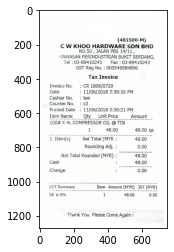

In [ ]:
plt.imshow(images[2].cpu().permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


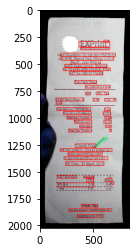

In [ ]:
bbs, confs, labels = decode_output(outputs[3])
new = images[3].cpu().permute(1,2,0)
for bb in bbs:
  cv2.rectangle(new.numpy(),(bb[0],bb[1]),(bb[2],bb[3]),(255,0,0),3)

plt.imshow(new) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


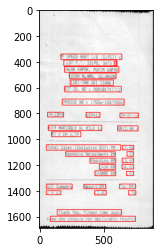

In [ ]:


bbs, confs, labels = decode_output(outputs[1])
new = images[1].cpu().permute(1,2,0)
for bb in bbs:
  cv2.rectangle(new.numpy(),(bb[0],bb[1]),(bb[2],bb[3]),(255,0,0),3)

plt.imshow(new)  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


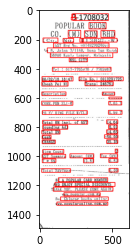

In [ ]:
bbs, confs, labels = decode_output(outputs[2])
new = images[2].cpu().permute(1,2,0)
for bb in bbs:
  cv2.rectangle(new.numpy(),(bb[0],bb[1]),(bb[2],bb[3]),(255,0,0),3)

plt.imshow(new)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


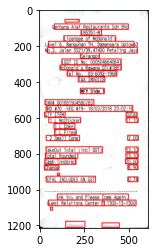

In [ ]:
bbs, confs, labels = decode_output(outputs[0])
new = images[0].cpu().permute(1,2,0)
for bb in bbs:
  cv2.rectangle(new.numpy(),(bb[0],bb[1]),(bb[2],bb[3]),(255,0,0),3)

plt.imshow(new) 

In [ ]:
!pip install pytorchtools